In [1]:
# Librerías básicas para manipulación y análisis de datos
import os
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para preprocesamiento y evaluación
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

# Modelos (regresión y clasificación)
from sklearn.linear_model import LinearRegression, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Otras utilidades
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Obtener el directorio actual
current_dir = os.getcwd()

In [3]:
current_dir

'C:\\Users\\vmascaro\\Desktop\\UNLP\\Machine_Learning\\ML_UNLP\\PS2\\scripts'

In [4]:
# Obtener el directorio actual
current_dir = os.getcwd()

# Buscar el directorio 'ML_UNLP' en el path
repo_dir = os.path.abspath(os.path.join(current_dir, '../../'))

# Cambiar al directorio ML_UNLP
os.chdir(repo_dir)

# Verificar que se cambió al directorio correcto
print("Directorio actual:", os.getcwd())

Directorio actual: C:\Users\vmascaro\Desktop\UNLP\Machine_Learning\ML_UNLP


## Carga de Datos

In [5]:
# Train
train_hogares = pd.read_csv("PS2/stores/train_hogares.csv")
train_hogares.head()

,id,Clase,Dominio,P5000,P5010,P5090,P5100,P5130,P5140,Nper,...,Ingpcug,Li,Lp,Pobre,Indigente,Npobres,Nindigentes,Fex_c,Depto,Fex_dpto
0,8d0193e328305a042001a35f,1,MEDELLIN,4,2,1,NaN,400000.0,NaN,5,...,5.816661e+05,122809.534158,289878.24715,0,0,0,0,127.222038,5,146.251790
1,cf7491d7f2cc9c216bd009e7,1,MEDELLIN,5,4,3,NaN,NaN,250000.0,4,...,1.612500e+05,122809.534158,289878.24715,1,0,4,0,115.866093,5,93.080952
2,d90a57f64d2a84dbacbed2a5,1,MEDELLIN,4,2,1,NaN,700000.0,NaN,3,...,2.000000e+06,122809.534158,289878.24715,0,0,0,0,100.123276,5,89.637086
3,db34e387a94a783188ab3a33,1,MEDELLIN,3,1,1,NaN,450000.0,NaN,1,...,2.450000e+06,122809.534158,289878.24715,0,0,0,0,108.829812,5,95.584376
4,97bbef785824746ecab09c6f,1,MEDELLIN,4,3,3,NaN,NaN,500000.0,5,...,2.520000e+05,122809.534158,289878.24715,1,0,5,0,110.412859,5,124.560515


In [6]:
train_hogares.columns

Index(['id', 'Clase', 'Dominio', 'P5000', 'P5010', 'P5090', 'P5100', 'P5130',
       'P5140', 'Nper', 'Npersug', 'Ingtotug', 'Ingtotugarr', 'Ingpcug', 'Li',
       'Lp', 'Pobre', 'Indigente', 'Npobres', 'Nindigentes', 'Fex_c', 'Depto',
       'Fex_dpto'],
      dtype='object')

In [9]:
# Imprimir el tipo de dato para cada columna
print("Tipos de dato para cada columna:")
print(train_hogares.dtypes)

# Filtrar columnas que son de tipo string (object en pandas)
string_columns = train_hogares.select_dtypes(include=['object']).columns

# Imprimir las columnas de tipo string
print("\nColumnas de tipo string:")
print(string_columns)

Tipos de dato para cada columna:
id              object
Clase            int64
Dominio         object
P5000            int64
P5010            int64
P5090            int64
P5100          float64
P5130          float64
P5140          float64
Nper             int64
Npersug          int64
Ingtotug       float64
Ingtotugarr    float64
Ingpcug        float64
Li             float64
Lp             float64
Pobre            int64
Indigente        int64
Npobres          int64
Nindigentes      int64
Fex_c          float64
Depto            int64
Fex_dpto       float64
dtype: object

Columnas de tipo string:
Index(['id', 'Dominio'], dtype='object')


## Variables

- `id`: primary key identificadora de vivienda, usada para conectar con las observacioens del dataset personas.
- `Clase`: 1 si la encuesta es respondida por la persona "cabecera", 2 "resto". 
- `Dominio`: Cada una de las 24 divisiones administrativas.
- `P5000`:  Incluyendo sala-comedor ¿de cuántos cuartos en total dispone este hogar?
- `P5010`: ¿en cuántos de esos cuartos duermen las personas de este hogar?
- `P5090`: La vivienda ocupada por este hogar es: propia/arriendo, etc
- `P5100`: Si tiene crédito de vivienda, ¿cuánto pagan mensualmente por cuota de amortización?
Cuando el informante declare que no sabe el valor de la cuota, escriba 98, si no informa el valor de la cuota, escriba en la línea de valor (99).
- `P5130`: Si tuviera que pagar arriendo por esta vivienda, ¿cuánto estima que tendría que pagar mensualmente?
Esta pregunta indaga sobre el estimativo del arriendo de las viviendas de los hogares propietarios, usufructuarios u ocupantes de hecho.
Si no es posible obtener este valor o el informante no lo informa, escriba en la línea 99.
- `P5140`: ¿cuánto pagan mensualmente por arriendo?
no sabe o no informa, escriba en la línea el valor (99).si paga pero no quiere informar el valor del arriendo escriba sobre la línea de valor (98).

- `Nper`: Número de personas en el hogar.
- `Npersug`: Número de personas en la unidad de gasto.
- `Ingtotug`: Ingreso total de la unidad de gasto antes de imputación de arriendos a propietarios y usufructuarios
- `Ingtotugarr`: Ingreso total de la unidad de gasto con imputación de arriendo a propietarios y usufructuarios
- `Ingpcug`: Ingreso percápita de la unidad de gasto con imputación de arriendo a propietarios y usufructuarios
- `Li`: Valor de la canasta básica de alimentos que establece el límite de ingresos por debajo del cual un hogar es considerado en pobreza extrema.
- `Lp`: Valor de la canasta básica de bienes que establece el límite de ingresos por debajo del cual un hogar es considerado en pobreza.
- `Pobre`: Variable que idenfifica los hogares en condiciones de pobreza. Target. Pobre=1 No pobre=0
20% pobres
- `Indigente`: Variable que idenfifica los hogares en condiciones de pobreza extrema. 4.5% idigentes
- `Npobres`: Número de personas en hogares clasificados como pobres.
- `Nindigentes`: Número de personas en hogares clasificados en pobreza extrema.
- `Fex_c`: Factor de expansión.
- `Depto`: Variable categórica que identifica el departamento, ya codificada.
- `Fex_dpto`: Factor Expansión departamental.



### Target

In [10]:
# Calcular la frecuencia de "Pobre" igual a 1 e "Indigente" igual a 1
frecuencia_pobre = train_hogares[train_hogares['Pobre'] == 1].shape[0]
frecuencia_indigente = train_hogares[train_hogares['Indigente'] == 1].shape[0]

# Calcular el porcentaje redondeado a dos decimales
porcentaje_pobre = round((frecuencia_pobre / train_hogares.shape[0]) * 100, 2)
porcentaje_indigente = round((frecuencia_indigente / train_hogares.shape[0]) * 100, 2)

# Crear el dataframe con los resultados
tabla_resumen = pd.DataFrame({
    'Categoría': ['Pobre', 'Indigente'],
    'Frecuencia': [frecuencia_pobre, frecuencia_indigente],
    'Porcentaje': [porcentaje_pobre, porcentaje_indigente]
})

# Mostrar la tabla
tabla_resumen

,Categoría,Frecuencia,Porcentaje
0,Pobre,33024,20.02
1,Indigente,7960,4.83


### Geográficas

Se puede observar que cada Dominio corresponde a un Departamento. Exceptuando RESTO URBANO y RURAL, los cuales como bien su nombre lo indica, corresponden a zonas urbanas y rurales respectivamente, presentes claro está en todos los departamentos.

No se debería excluir Depto porque, por ejemplo, zona rural de Medellin se diferencia con la zona rural de Cali por la combinación de variable Depto-Dominio. Incluso, podría crearse una variable procedente de la combinación de las mismas, para reemplazar las dos variables anteriores.

Así mismo, no se debería excluir Dominio, dado que aporta una variabilidad entre ciudad-resto urbano-rural, que si se eliminase, desaparecería.

In [11]:
#verificar si las columnas `Dominio` y `Depto` están relacionadas
combinaciones = train_hogares[['Dominio', 'Depto']].drop_duplicates().sort_values('Dominio')
combinaciones

,Dominio,Depto
1975,ARMENIA,63
178,BARRANQUILLA,8
316,BOGOTA,11
2206,BUCARAMANGA,68
2508,CALI,76
...,...,...
1548,SANTA MARTA,47
2305,SINCELEJO,70
614,TUNJA,15
1035,VALLEDUPAR,20


In [12]:
# Verificar si un valor de 'Dominio' se asocia con múltiples valores de 'Depto'
domin_depto = train_hogares.groupby('Dominio')['Depto'].nunique()
print(domin_depto)

# Verificar si un valor de 'Depto' se asocia con múltiples valores de 'Dominio'
depto_domin = train_hogares.groupby('Depto')['Dominio'].nunique()
print(depto_domin)


Dominio
ARMENIA           1
BARRANQUILLA      1
BOGOTA            1
BUCARAMANGA       1
CALI              1
CARTAGENA         1
CUCUTA            1
FLORENCIA         1
IBAGUE            1
MANIZALES         1
MEDELLIN          1
MONTERIA          1
NEIVA             1
PASTO             1
PEREIRA           1
POPAYAN           1
QUIBDO            1
RESTO URBANO     23
RIOHACHA          1
RURAL            23
SANTA MARTA       1
SINCELEJO         1
TUNJA             1
VALLEDUPAR        1
VILLAVICENCIO     1
Name: Depto, dtype: int64
Depto
5     3
8     3
11    1
13    3
15    3
17    3
18    3
19    3
20    3
23    3
25    2
27    3
41    3
44    3
47    3
50    3
52    3
54    3
63    3
66    3
68    3
70    3
73    3
76    3
Name: Dominio, dtype: int64


In [13]:
# Ver combinaciones de 'Dominio' y 'Depto' con su frecuencia
combinaciones_frecuentes = train_hogares.groupby(['Dominio', 'Depto']).size().reset_index(name='Frecuencia')
print(combinaciones_frecuentes.sort_values('Frecuencia', ascending=False))

         Dominio  Depto  Frecuencia
2         BOGOTA     11       10567
10      MEDELLIN      5        8921
4           CALI     76        6666
1   BARRANQUILLA      8        6568
9      MANIZALES     17        6108
..           ...    ...         ...
28  RESTO URBANO     41         504
48         RURAL     20         450
25  RESTO URBANO     23         442
58         RURAL     63         380
42         RURAL      8         188

[69 rows x 3 columns]


In [14]:
import pandas as pd

# Filtrar el DataFrame por 'Depto' igual a 5
filtro_depto_5 = train_hogares[train_hogares['Depto'] == 5]
dominio_unicos_5 = filtro_depto_5['Dominio'].unique()

# Filtrar el DataFrame por 'Depto' igual a 76
filtro_depto_76 = train_hogares[train_hogares['Depto'] == 76]
dominio_unicos_76 = filtro_depto_76['Dominio'].unique()

# Crear un DataFrame con los resultados
data = {
    'Depto': ['5', '76'],
    'Dominio': [', '.join(dominio_unicos_5), ', '.join(dominio_unicos_76)]
}

result_df = pd.DataFrame(data)

# Mostrar el DataFrame
print(result_df)


  Depto                        Dominio
0     5  MEDELLIN, RURAL, RESTO URBANO
1    76      CALI, RESTO URBANO, RURAL


### Ingreso

#### Ingresos y Líneas de Pobreza e Indigencia

Se puede indicar que, dadas las tres variables de ingresos:

- `Ingtotug`: Ingreso total de la unidad de gasto antes de imputación de arriendos a propietarios y usufructuarios
- `Ingtotugarr`: Ingreso total de la unidad de gasto con imputación de arriendo a propietarios y usufructuarios
- `Ingpcug`: Ingreso percápita de la unidad de gasto con imputación de arriendo a propietarios y usufructuarios

y considerando las Líneas de Pobreza `Lp` e Indigencia `Li`, parece ser que `Ingtotug` es la variable utilizada para crear las variables binarias `Pobre` e `Indigente`.

In [15]:
# Filtrar las filas donde Ingtotug < Lp
condicion = train_hogares[train_hogares['Ingtotug'] < train_hogares['Lp']]

# Verificar si Pobre es igual a 1 en esas filas
resultado = condicion[condicion['Pobre'] != 1]

# Mostrar el resultado
if resultado.empty:
    print("La condición se cumple: Ingtotug < Lp implica Pobre = 1 en todos los casos.")
else:
    print(f"Hay {len(resultado)} casos donde Ingtotug < Lp pero Pobre no es igual a 1.")
    print(resultado[['Ingtotug', 'Ingtotugarr','Lp', 'Pobre']])

Hay 1758 casos donde Ingtotug < Lp pero Pobre no es igual a 1.
             Ingtotug    Ingtotugarr             Lp  Pobre
39       45000.000000  395000.000000  289878.247150      0
83       83333.333333  583333.333333  289878.247150      0
337      60000.000000  860000.000000  273978.808652      0
354          0.000000  800000.000000  273978.808652      0
681     220000.000000  570000.000000  271912.549708      0
...               ...            ...            ...    ...
164582  240000.000000  340000.000000  286810.818838      0
164612   12500.000000  412500.000000  284157.853036      0
164620  141666.666667  741666.666667  284157.853036      0
164644  225000.000000  375000.000000  280234.432107      0
164948  220000.000000  620000.000000  284202.607354      0

[1758 rows x 4 columns]


In [16]:
# Filtrar las filas donde Ingtotugarr < Lp
condicion = train_hogares[train_hogares['Ingtotugarr'] < train_hogares['Lp']]

# Verificar si Pobre es igual a 1 en esas filas
resultado = condicion[condicion['Pobre'] != 1]

# Mostrar el resultado
if resultado.empty:
    print("La condición se cumple: Ingtotugarr < Lp implica Pobre = 1 en todos los casos.")
else:
    print(f"Hay {len(resultado)} casos donde Ingtotug < Lp pero Pobre no es igual a 1.")
    print(resultado[['Ingtotug', 'Ingtotugarr','Lp', 'Pobre']])

La condición se cumple: Ingtotugarr < Lp implica Pobre = 1 en todos los casos.


In [17]:
# Filtrar las filas donde Ingtotugarr < Li
condicion = train_hogares[train_hogares['Ingtotugarr'] < train_hogares['Li']]

# Verificar si Indigente es igual a 1 en esas filas
resultado = condicion[condicion['Indigente'] != 1]

# Mostrar el resultado
if resultado.empty:
    print("La condición se cumple: Ingtotugarr < Li implica Indigente = 1 en todos los casos.")
else:
    print(f"Hay {len(resultado)} casos donde Ingtotugarr < Li pero Indigente no es igual a 1.")
    print(resultado[['Ingtotugarr', 'Li', 'Indigente']])


La condición se cumple: Ingtotugarr < Li implica Indigente = 1 en todos los casos.


#### Cantidad de Pobres e Indigentes

dadas las definiciones:

- `Npobres`: Número de personas en hogares clasificados como pobres.
- `Nindigentes`: Número de personas en hogares clasificados en pobreza extrema.

y 

- `Nper`: Número de personas en el hogar.
- `Npersug`: Número de personas en la unidad de gasto.

Conclusiones:
* En un Hogar puede haber una o +1 Unidades de Gasto, pero no al contrario.
* Pobreza e Indigencia se miden a nivel de Hogar y no de Unidad de Gasto.

La unidad de gasto (que podría ser un subconjunto de personas dentro del hogar) debería tener siempre un número de personas menor o igual al número total de personas en el hogar. Esto se debe a que la unidad de gasto es una división dentro del hogar y, por tanto, el número de personas en la unidad de gasto nunca debería ser mayor que el número total de personas en el hogar.

In [18]:
# Filtrar filas donde Npersug es mayor que Nper
resultado = train_hogares[train_hogares['Npersug'] > train_hogares['Nper']]

# Mostrar los resultados
if resultado.empty:
    print("El número de personas en la unidad de gasto (Npersug) es siempre un subconjunto de el número de personas en el hogar (Nper).")
else:
    print(f"Hay {len(resultado)} casos donde Npersug es mayor que Nper.")
    print(resultado[['Npersug', 'Nper']])


El número de personas en la unidad de gasto (Npersug) es siempre un subconjunto de el número de personas en el hogar (Nper).


In [19]:
# Filtrar filas donde Npobres y Nindigentes son diferentes de cero
condicion = train_hogares[(train_hogares['Npobres'] != 0) & (train_hogares['Nindigentes'] != 0)]

# Verificar si Npobres es igual a Nper en esas filas
resultado_npobres = condicion[condicion['Npobres'] != condicion['Nper']]

# Verificar si Nindigentes es igual a Nper en esas filas
resultado_nindigentes = condicion[condicion['Nindigentes'] != condicion['Nper']]

# Mostrar los resultados
if resultado_npobres.empty:
    print("La condición se cumple: Npobres es igual a Nper en todos los casos.")
else:
    print(f"Hay {len(resultado_npobres)} casos donde Npobres es diferente de Nper.")
    print(resultado_npobres[['Npobres', 'Nper', 'Nindigentes', 'Nper']])

if resultado_nindigentes.empty:
    print("La condición se cumple: Nindigentes es igual a Nper en todos los casos.")
else:
    print(f"Hay {len(resultado_nindigentes)} casos donde Nindigentes es diferente de Nper.")
    print(resultado_nindigentes[['Npobres', 'Nindigentes', 'Nper', 'Npersug']])


La condición se cumple: Npobres es igual a Nper en todos los casos.
La condición se cumple: Nindigentes es igual a Nper en todos los casos.


In [20]:
# Filtrar filas donde Npobres y Nindigentes son diferentes de cero
condicion = train_hogares[(train_hogares['Npobres'] != 0) & (train_hogares['Nindigentes'] != 0)]

# Verificar si Npobres es igual a Npersug en esas filas
resultado_npobres = condicion[condicion['Npobres'] != condicion['Npersug']]

# Verificar si Nindigentes es igual a Npersug en esas filas
resultado_nindigentes = condicion[condicion['Nindigentes'] != condicion['Npersug']]

# Mostrar los resultados
if resultado_npobres.empty:
    print("La condición se cumple: Npobres es igual a Npersug en todos los casos.")
else:
    print(f"Hay {len(resultado_npobres)} casos donde Npobres es diferente de Npersug.")
    #print(resultado_npobres[[ 'Npersug', 'Nper', 'Npobres','Nindigentes']])

if resultado_nindigentes.empty:
    print("La condición se cumple: Nindigentes es igual a Npersug en todos los casos.")
else:
    print(f"Hay {len(resultado_nindigentes)} casos donde Nindigentes es diferente de Npersug.")
    #print(resultado_nindigentes[['Npobres', 'Nindigentes', 'Nper', 'Npersug']])


Hay 21 casos donde Npobres es diferente de Npersug.
Hay 21 casos donde Nindigentes es diferente de Npersug.


## Variables despreciables

Dado que los factores de expansión (`Fex_c` y `Fex_dpto`) son utilizados para ajustar los resultados de la muestra a la población total y no contienen información sobre las características del hogar o las personas, no tienen relevancia para predecir si un hogar es pobre o no. En consecuencia, no deben ser incluidos en el modelo predictivo, ya que podrían agregar ruido innecesario y disminuir la capacidad del modelo para identificar patrones verdaderamente relevantes.

La cantidad de pobres e indigentes (`Npobres` y `Nindigentes` ) deben ser eliminadas del modelo porque son el resultado de la clasificación de pobreza y pobreza extrema, que es exactamente lo que estamos tratando de predecir. Incluir estas variables en el modelo introduciría redundancia y podría generar fugas de información (*data leakage*), lo que afectaría negativamente la capacidad del modelo para generalizar a datos no vistos.

## Missing Values / Outliers

In [21]:
### valores 98 y 99 de variables monetarias (cuota de hipoteca y arriendo)

In [22]:
X_train = train_hogares

<Axes: >

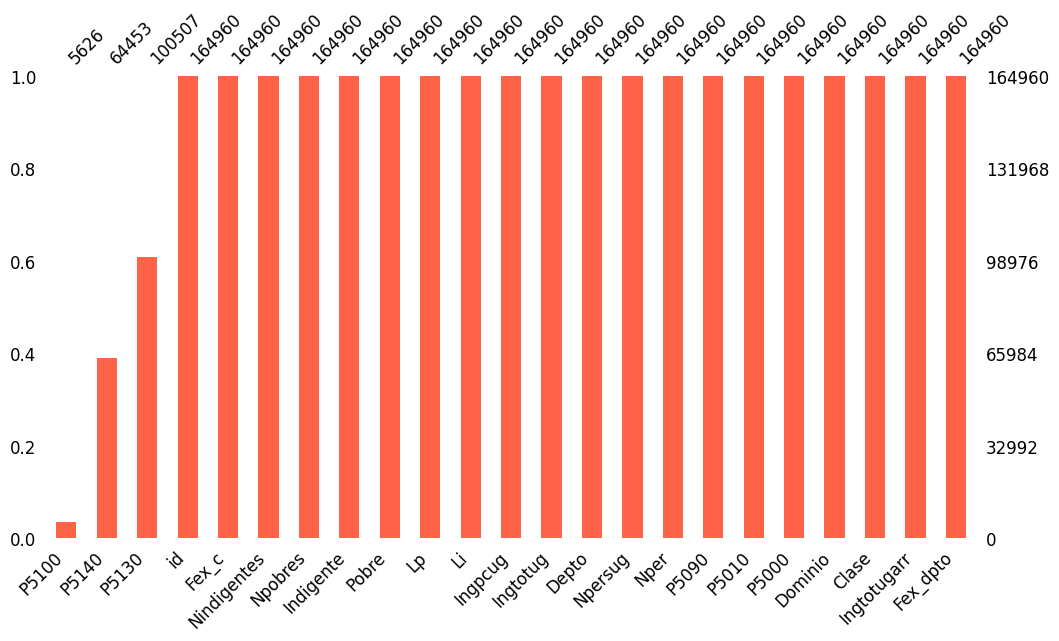

In [23]:
import missingno as msno
msno.bar(X_train,figsize=(12, 6), sort="ascending",fontsize=12, color='tomato')

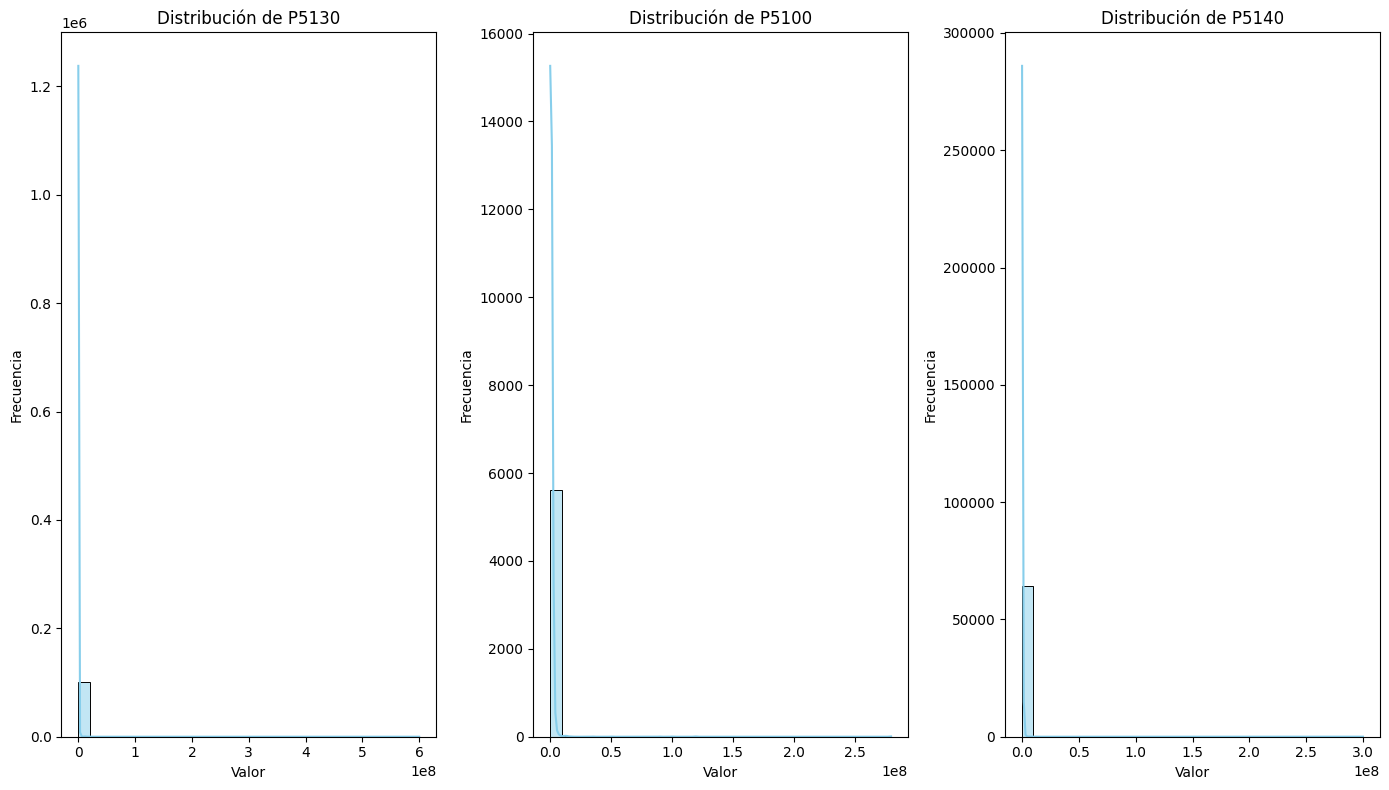

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos las columnas de interés
columns_to_plot = ['P5130', 'P5100', 'P5140']

# Crear subgráficos
plt.figure(figsize=(14, 8))

# Graficar histogramas para cada una de las columnas
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.histplot(X_train[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [27]:
columns_to_impute = ['P5100', 'P5130', 'P5140']

In [28]:
# Seleccionar el quintil deseado (por ejemplo, el 95%)
quintil = 0.95
# el método quantile de Pandas por defecto ignora los valores NaN, por lo que no debería estar considerando los NaN al calcular el umbral.
# Calcular el quintil para las columnas de interés
thresholds = X_train[columns_to_impute].quantile(quintil)

# Mostrar los valores de los umbrales basados en el quintil seleccionado
print(f"Umbrales automáticos (Q{int(quintil * 100)}):\n", thresholds)

# Ver las filas donde los valores superan el umbral en cada columna (basado en el quintil)
rows_to_drop = X_train[
    (X_train['P5130'] > thresholds['P5130']) |
    (X_train['P5100'] > thresholds['P5100']) |
    (X_train['P5140'] > thresholds['P5140'])
]

# Mostrar cuántas filas serían eliminadas
print(f"Filas a eliminar: {rows_to_drop.shape[0]}")

Umbrales automáticos (Q95):
 P5100    2000000.0
P5130    1000000.0
P5140     870000.0
Name: 0.95, dtype: float64
Filas a eliminar: 8188


In [29]:
print(X_train[columns_to_impute].describe())

              P5100         P5130         P5140
count  5.626000e+03  1.005070e+05  6.445300e+04
mean   9.199432e+05  4.998408e+05  4.379118e+05
std    6.115976e+06  4.163131e+06  1.447543e+06
min    9.800000e+01  9.800000e+01  2.000000e+01
25%    3.000000e+05  2.000000e+05  2.500000e+05
50%    5.000000e+05  3.500000e+05  3.800000e+05
75%    8.938750e+05  5.000000e+05  5.000000e+05
max    2.800000e+08  6.000000e+08  3.000000e+08


In [30]:
# Filtrar las filas donde los valores de las columnas superen los umbrales (Q3)
X_train_filtered = X_train[
    (X_train['P5130'] <= thresholds['P5130']) &
    (X_train['P5100'] <= thresholds['P5100']) &
    (X_train['P5140'] <= thresholds['P5140'])
]

# Verificar las estadísticas después del filtro
print(X_train_filtered[columns_to_impute].describe())


       P5100  P5130  P5140
count    0.0    0.0    0.0
mean     NaN    NaN    NaN
std      NaN    NaN    NaN
min      NaN    NaN    NaN
25%      NaN    NaN    NaN
50%      NaN    NaN    NaN
75%      NaN    NaN    NaN
max      NaN    NaN    NaN


In [31]:
X_train_filtered

,id,Clase,Dominio,P5000,P5010,P5090,P5100,P5130,P5140,Nper,...,Ingpcug,Li,Lp,Pobre,Indigente,Npobres,Nindigentes,Fex_c,Depto,Fex_dpto


### Outliers

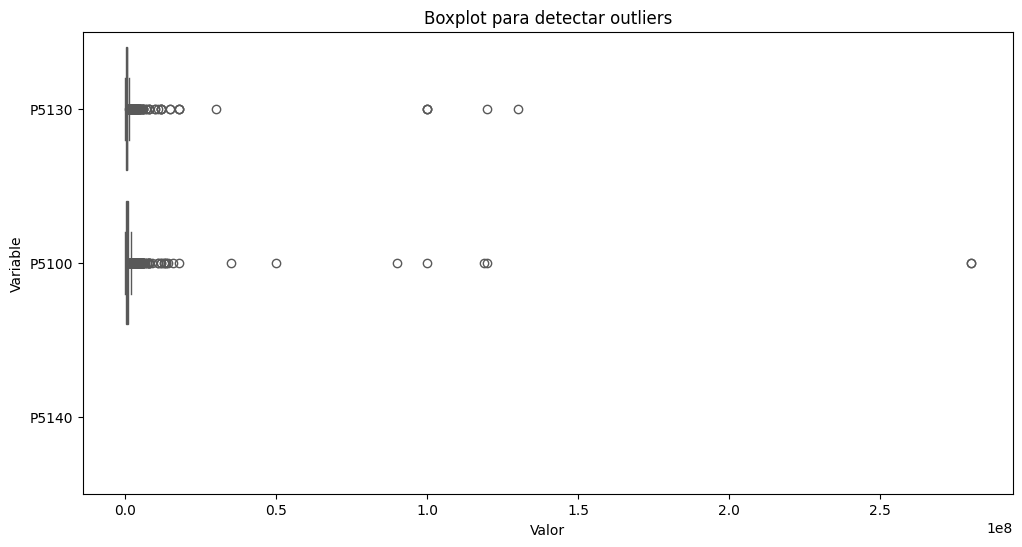

In [42]:
# Seleccionamos las columnas de interés
columns_to_plot = ['P5100', 'P5130', 'P5140']
X_train_filtered = X_train[X_train['P5100'] >= 100]
# Crear un gráfico de boxplot para ver los outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_filtered[columns_to_plot], orient="h", palette="Set2")
plt.title('Boxplot para detectar outliers')
plt.xlabel('Valor')
plt.ylabel('Variable')
plt.show()

#### P5100

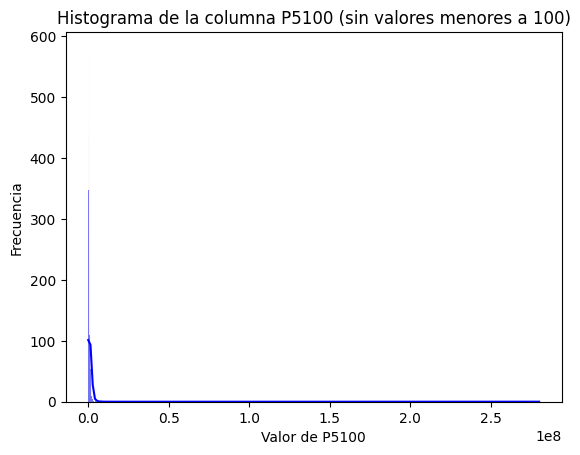

In [33]:
#incluso eliminando los mpas chicos hay una gran cola a la derecha

# Eliminar los valores menores a 100 en la columna 'P5100'
X_train_filtered = X_train[train_hogares['P5100'] >= 100]

# Generar el histograma de la columna 'P5100' sin valores menores a 100
sns.histplot(X_train_filtered['P5100'], kde=True, color='blue')

# Configuración de título y etiquetas
plt.title('Histograma de la columna P5100 (sin valores menores a 100)')
plt.xlabel('Valor de P5100')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


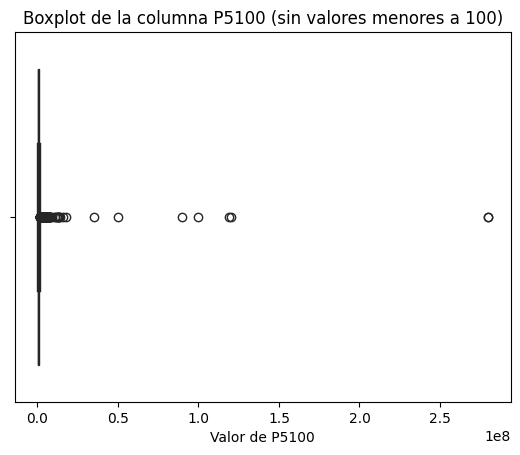

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Eliminar los valores menores a 100 en la columna 'P5100'
X_train_filtered = X_train[X_train['P5100'] >= 100]

# Generar el boxplot de la columna 'P5100' sin valores menores a 100
sns.boxplot(x=X_train_filtered['P5100'], color='green')

# Configuración de título y etiquetas
plt.title('Boxplot de la columna P5100 (sin valores menores a 100)')
plt.xlabel('Valor de P5100')

# Mostrar el gráfico
plt.show()


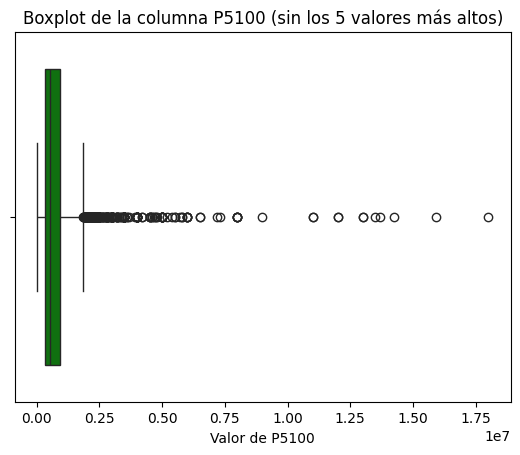

In [35]:
# Filtrar los 5 valores máximos en la columna 'P5100'
top_5_outliers = X_train_filtered['P5100'].nlargest(8)

# Eliminar esos 5 valores del DataFrame
X_train_no_outliers = X_train_filtered[~X_train_filtered['P5100'].isin(top_5_outliers)]

# Generar el boxplot después de eliminar los outliers
sns.boxplot(x=X_train_no_outliers['P5100'], color='green')

# Configuración de título y etiquetas
plt.title('Boxplot de la columna P5100 (sin los 8 valores más altos)')
plt.xlabel('Valor de P5100')

# Mostrar el gráfico
plt.show()


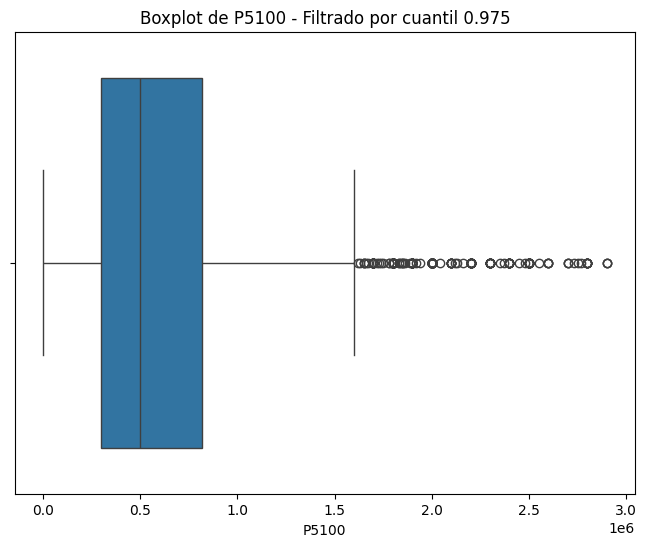

In [43]:
# Filtrar el valor máximo que corresponde al cuantil 0.975
quantile_975 = X_train['P5100'].quantile(0.975)

# Filtrar el DataFrame para quedarnos solo con los valores menores o iguales a este cuantil
X_train_filtered = X_train[X_train['P5100'] <= quantile_975]

# Mostrar el boxplot después de filtrar los valores extremos
plt.figure(figsize=(8, 6))
sns.boxplot(data=X_train_filtered, x='P5100')
plt.title("Boxplot de P5100 - Filtrado por cuantil 0.975")
plt.show()


#### Outliers de P5130

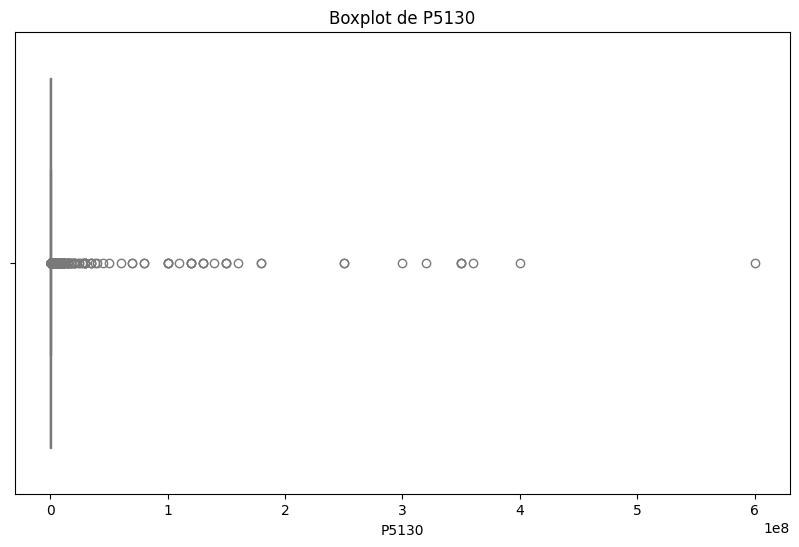

In [45]:
# Boxplot para la columna P5130
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train, x='P5130', color='lightblue')
plt.title("Boxplot de P5130")
plt.xlabel("P5130")
plt.show()

## Template de output

In [36]:
sample_submission = pd.read_csv("PS2/stores/sample_submission.csv")
print(sample_submission)

                             id  pobre
0      2a7ddc2779480d7f19834953      0
1      a0c2e751e582fd49d564f308      0
2      57273d19e8464a5ff66a582b      1
3      418d052ff7878940ab938601      0
4      212a37fc17016a3c78f76852      1
...                         ...    ...
66163  e7d3c7cc62acd33867b7b7ee      0
66164  710db9f02de9c616f846c72e      0
66165  5a0d6b6fad06e4736fb6d95f      0
66166  569496964b70185785b57789      1
66167  225c4a98fcfad97cf4b08d0f      0

[66168 rows x 2 columns]


### Test tiene menos columnas que Train

In [37]:
test_hogares = pd.read_csv("PS2/stores/test_hogares.csv")

In [38]:
# Identificar las columnas con valores faltantes en X_train y test_hogares
missing_train_cols = train_hogares.columns[train_hogares.isnull().sum() > 0]
missing_test_cols = test_hogares.columns[test_hogares.isnull().sum() > 0]

# Asegurarse de que las columnas con valores faltantes estén presentes en ambos datasets
columns_to_impute = list(set(missing_train_cols).union(set(missing_test_cols)))

# Mostrar las columnas que serán imputadas
print(f"Columnas a imputar: {columns_to_impute}")

Columnas a imputar: ['P5130', 'P5100', 'P5140']


In [39]:
set(test_hogares.columns) - set(train_hogares.columns)

set()

In [40]:
set(train_hogares.columns) - set(test_hogares.columns)

{'Indigente',
 'Ingpcug',
 'Ingtotug',
 'Ingtotugarr',
 'Nindigentes',
 'Npobres',
 'Pobre'}

In [41]:
### Identificadores

# Guardar el identificador de los hogares en el conjunto de prueba
test_ids = test_hogares['id']

# Eliminar 'id' de las características para que no interfiera en el modelo
train_hogares = train_hogares.drop('id', axis=1)
test_hogares = test_hogares.drop('id', axis=1)

In [47]:
test_hogares.Dominio.unique()

array(['SANTA MARTA', 'RURAL', 'MEDELLIN', 'MANIZALES', 'VALLEDUPAR',
       'BUCARAMANGA', 'VILLAVICENCIO', 'CALI', 'BARRANQUILLA', 'IBAGUE',
       'PEREIRA', 'RESTO URBANO', 'QUIBDO', 'ARMENIA', 'TUNJA', 'NEIVA',
       'CARTAGENA', 'PASTO', 'MONTERIA', 'POPAYAN', 'FLORENCIA', 'CUCUTA',
       'SINCELEJO', 'RIOHACHA'], dtype=object)